In [1]:
from qPCR_analysis import Data_processing
from qPCR_analysis import Plotting
from qPCR_analysis import Statistics

import numpy as np 
import pandas as pd 
import scipy 
import matplotlib.pyplot as plt


***Primer Efficiency tutorial***

This tutorial will show how to use the functions to calculate primer efficiency of a dilution series.
In order to calculate primer efficiency, you will need csv file with the following headings: 

'Gene'
'Dilution'
'Ct1'
'Ct2'
'Ct3'

Import your CSV using the function *import_and_tidy_data* using the filepath your csv file 


The overall pipeline will be to use the *primer_efficiency* function. This will generate a pandas dataframe with your gene, slope, intercept, error, R_value, P_value, and Primer effiency. 


  Gene     Slope  Intercept     Error         R   p_value  Primer Efficiency
0  GOI -3.514838    20.9991  0.098754 -0.999212  0.000788              92.53


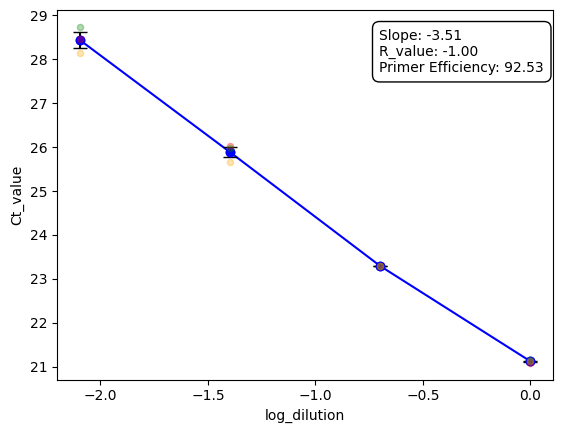

In [2]:
import pandas as pd 
#Import dataset 
myData = Data_processing.import_and_tidy_data('data/dilution_testdata.csv')

#Get primer efficiency 
primer_efficiency = Data_processing.primer_efficiency(myData, 'GOI')
print(primer_efficiency)
a = Plotting.plot_efficiency_graph(myData, primer_efficiency, 'GOI')


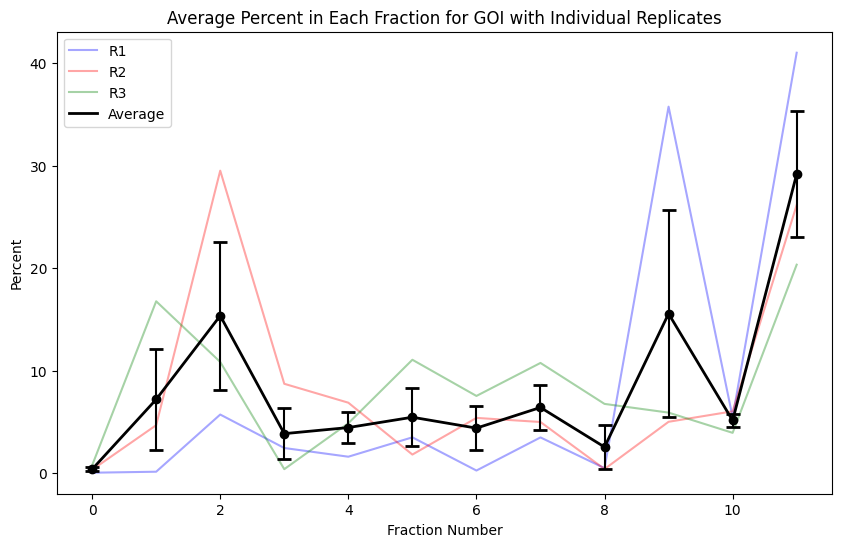

In [3]:
polysome_test = Data_processing.import_and_tidy_data('data/polysome_profile_testdata.csv')
df1 = Data_processing.polysome_profiling_analysis(polysome_test, 'GOI','Untreated', 3)
Plotting.plot_gene_fractions(df1, 'GOI')

In [4]:
df = Data_processing.import_and_tidy_data('data/test_data.csv')
df = Data_processing.pfaffl('GOI', 'Control', 'Treated', 'Untreated', 1, 1, df)

df

,Gene,Condition,Gene Expression Ratio 1,Gene Expression Ratio 2,Gene Expression Ratio 3,Average GER,SEM GER
0,GOI,Untreated,1.024334,1.038348,1.030498,1.031060,0.004055
1,GOI,Treated,1.053246,1.070517,1.063249,1.062337,0.005007


In [5]:
df = df.pivot_table(index=['Replicate', 'Condition'], columns='Gene', values=['Ct_value', 'DeltaCt'])
df

KeyError: 'Ct_value'